In [99]:
# Exploratory Behavior Analysis
#
# Umesh Singla

In [1]:
import pickle
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
from copy import deepcopy
# import plotly.graph_objects as go
from scipy.optimize import curve_fit
from dataclasses import make_dataclass

import sys
module_path = '../src' 
if module_path not in sys.path:
    sys.path.append(module_path)

# Markus's code
from MM_Plot_Utils import plot, hist
from MM_Maze_Utils import *
from MM_Traj_Utils import *

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from collections import defaultdict

In [3]:
# Some lists of nicknames for mice
UnrewNames=['B5','B6','B7','D3','D4','D5','D6','D7','D8','D9']
RewNames=['B1','B2','B3','B4','C1','C3','C6','C7','C8','C9']
AllNames=RewNames+UnrewNames
UnrewNamesSub=['B5','B6','B7','D3','D4','D5','D7','D8','D9'] # excluding D6 which barely entered the maze

frame rate = 30 Hz

In [10]:
outdata_path = '../outdata/'

In [11]:
# List number of bouts for each animal
print('mouse  bouts')
to=0
max_bouts = 0
for nickname in AllNames:
    tf = LoadTrajFromPath(outdata_path+nickname+'-tf')
    print(nickname+'     ',len(tf.no))
    
    if len(tf.no) > max_bouts:
        max_bouts = len(tf.no)
        
    to+=len(tf.no)
print('Total  ',to)

mouse  bouts
B1      104
B2      166
B3      147
B4      238
C1      173
C3      339
C6      150
C7      135
C8      164
C9      127
B5      245
B6      223
B7      204
D3      245
D4      319
D5      180
D6      59
D7      150
D8      109
D9      102
Total   3579


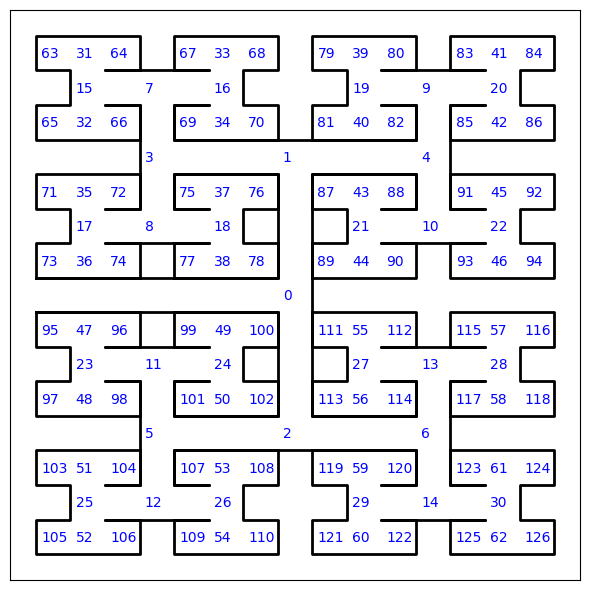

In [16]:
# Draw maze with node numbers
ma=NewMaze(6)
PlotMazeNodes(ma,figsize=6)

In [6]:
# define node numbers of all nodes
lv6_nodes = list(range(63,127))
lv5_nodes = list(range(31,63))
lv4_nodes = list(range(15,31))
lv3_nodes = list(range(7,15))
lv2_nodes = list(range(3,7))
lv1_nodes = list(range(1,3))
lv0_nodes = list(range(0,1))
lvl_dict = {0:lv0_nodes, 1:lv1_nodes, 2:lv2_nodes, 3:lv3_nodes, 4:lv4_nodes, 5:lv5_nodes, 6:lv6_nodes}

In [10]:
# inverse-define node numbers of all nodes mapped to depth
inv_lvl_dict = {n: level for level, nodes in lvl_dict.items() for n in nodes}
inv_lvl_dict[127] = -1   # home

### Fig. Max depth in initial few bouts
Ideally first bout but not all mouse went into the maze properly at once.
Some took 4 bouts, some only 1 or 2 and some even 14.

Name B1
bout: 0 length: 1 max_depth 0
bout: 1 length: 1 max_depth 0
bout: 2 length: 1 max_depth 0
bout: 3 length: 1 max_depth 0
===
Name B2
bout: 0 length: 1 max_depth 0
bout: 1 length: 992 max_depth 6
bout: 2 length: 452 max_depth 6
bout: 3 length: 202 max_depth 6
===
Name B3
bout: 0 length: 1 max_depth 0
bout: 1 length: 1 max_depth 0
bout: 2 length: 1 max_depth 0
bout: 3 length: 1 max_depth 0
===
Name B4
bout: 0 length: 1 max_depth 0
bout: 1 length: 1 max_depth 0
bout: 2 length: 646 max_depth 6
bout: 3 length: 64 max_depth 6
===
Name C1
bout: 0 length: 1 max_depth 0
bout: 1 length: 2 max_depth 0
bout: 2 length: 240 max_depth 6
bout: 3 length: 134 max_depth 6
===
Name C3
bout: 0 length: 1 max_depth 0
bout: 1 length: 38 max_depth 6
bout: 2 length: 296 max_depth 6
bout: 3 length: 34 max_depth 6
===
Name C6
bout: 0 length: 1 max_depth 0
bout: 1 length: 222 max_depth 6
bout: 2 length: 2506 max_depth 6
bout: 3 length: 448 max_depth 6
===
Name C7
bout: 0 length: 1240 max_depth 6
bout: 1 len

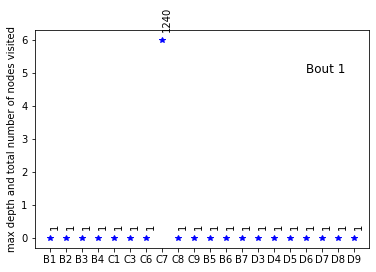

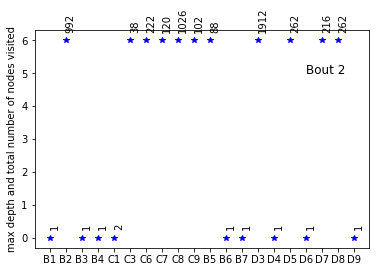

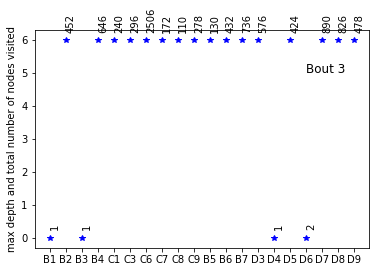

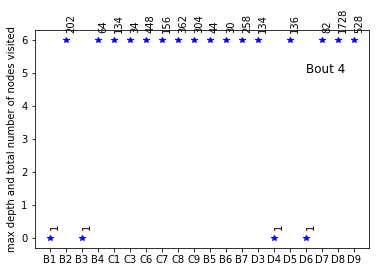

In [96]:
# Taking first 4 bouts.
first_n = 4
max_depth_first_bout = defaultdict(list)
for nick in AllNames:
    tf=LoadTraj(nick+'-tf')
    print("Name", nick)
    for b, bout in enumerate(tf.no[:first_n]):
        max_depth = max([node for node, _ in bout[:-1]], default=0)
        print("bout:", b, "length:", len(bout), "max_depth", inv_lvl_dict[max_depth])
        max_depth_first_bout[nick].append((inv_lvl_dict[max_depth], len(bout)))
    print("===")


for i in range(first_n):
    for k, v in max_depth_first_bout.items():
        y = [x[0] for x in v[i:i+1]][0]
        x = AllNames.index(k)
        plt.plot(x, y, 'b*')
        plt.text(x, y+0.3, v[i:i+1][0][1], fontsize=10, rotation=90)
    plt.xticks(ticks=np.arange(0,20), labels=AllNames)
    plt.text(16, 5, f'Bout {i+1}', fontsize=12)
    plt.ylabel(f'max depth and total number of nodes visited')
    plt.show()

### Fig. Number of nodes from home to the first ever end node visit
It's supposed to tell us how "straight" mouse went to its first end node (will be 6 in that case) or not (>6) when it **first** started exploring 

Name B1
bout: 13 length: 32 number of nodes before the first end node visit 6
bout: 14 length: 104 number of nodes before the first end node visit 6
===
Name B2
bout: 1 length: 992 number of nodes before the first end node visit 6
bout: 2 length: 452 number of nodes before the first end node visit 6
bout: 3 length: 202 number of nodes before the first end node visit 16
bout: 4 length: 128 number of nodes before the first end node visit 6
bout: 5 length: 188 number of nodes before the first end node visit 6
bout: 6 length: 56 number of nodes before the first end node visit 16
bout: 7 length: 518 number of nodes before the first end node visit 8
bout: 8 length: 194 number of nodes before the first end node visit 6
bout: 9 length: 22 number of nodes before the first end node visit 6
bout: 10 length: 250 number of nodes before the first end node visit 6
bout: 11 length: 54 number of nodes before the first end node visit 6
bout: 12 length: 84 number of nodes before the first end node visit 

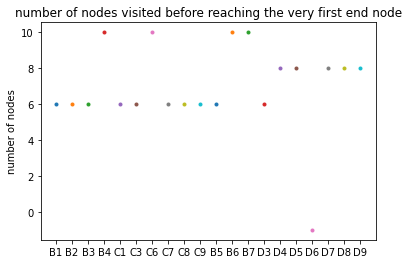

In [98]:
# Taking first 15 bouts because every mouse visits an end node by bout 15, except D6.
first_n = 15

a = [[-1] * first_n for i in range(len(AllNames))]
for mouse_no, nick in enumerate(AllNames):
    tf=LoadTraj(nick+'-tf')
    print("Name", nick)
    for b, bout in enumerate(tf.no[:first_n]):
        n = 0
        visited_any_end_node = False
        for node, _ in bout[:-1]:
            if inv_lvl_dict[node] >= 6:
                visited_any_end_node = True
                break
            n += 1
        if visited_any_end_node:
            a[mouse_no][b] = n
            print("bout:", b, "length:", len(bout), "number of nodes before the first end node visit", n)
    print("===")

# plot the max of each rows
for mouse_no in range(len(AllNames)):
    first_non_zero = -1
    for n in a[mouse_no]:
        if n > 0:
            first_non_zero = n
            break
    plt.plot(mouse_no, first_non_zero,'.')
plt.xticks(ticks=np.arange(0,20), labels=AllNames)
plt.ylabel(f'number of nodes')
plt.title('number of nodes visited before reaching the very first end node')
plt.show()